# Synoptic Data's API

[Synoptic’s Mesonet API](https://developers.synopticdata.com/mesonet/) is a powerful and fully scalable service for accessing an expansive database of real-time and historical surface-based weather observations from over 90,000 public and private observing stations, yielding over 96 million observations daily available to Synoptic users. This RESTful API is a request-based data delivery service using a simple HTTP call that can extract minutes or years of data in seconds for locations across the globe. Synoptic's Mesonet API allows for complete customization via an API call, allowing the user to request specific variables at any time for an exact location anywhere on the globe, find all stations within a certain radius of a location, and more.

## Important Links

- [Mesonet API Dev Page](https://developers.synopticdata.com/mesonet/)

- [Getting Started with Synoptic's API](https://developers.synopticdata.com/mesonet/v2/getting-started/)

- [Query String Interactive Builder](https://developers.synopticdata.com/mesonet/explorer/)

- [Query Documentation](https://developers.synopticdata.com/mesonet/explorer/)





### Basic Python Example

In [24]:
# import packages
import requests
import os
import pandas as pd

# define global variables
API_TOKEN = # Your token here!
API_ROOT = "https://api.synopticdata.com/v2/"

# build api url querying the latest stations
api_request_url = os.path.join(API_ROOT, "stations/latest")

# build api argument parameters dictionary
api_arguments = {"token":API_TOKEN,"stid":"KLAX"}

# request data from synoptic's api based off of URL and api args
req = requests.get(api_request_url, params=api_arguments)

# create dictionary from requests object
data_dict = req.json()


In [36]:
data_dict['SUMMARY']

{'DATA_QUERY_TIME': '2.03108787537 ms',
 'RESPONSE_CODE': 1,
 'RESPONSE_MESSAGE': 'OK',
 'METADATA_RESPONSE_TIME': '3.03983688354 ms',
 'DATA_PARSING_TIME': '0.53596496582 ms',
 'VERSION': 'v2.17.0',
 'TOTAL_DATA_TIME': '2.5680065155 ms',
 'NUMBER_OF_OBJECTS': 1}

In [53]:
# parse out the observations to a separate dictionary
data_obs = data_dict['STATION'][0]['OBSERVATIONS']

# let's print the air temperature value
data_obs['air_temp_value_1']

{'date_time': '2023-01-08T00:15:00Z', 'value': 15.0}

In [54]:
# let's print the sea level pressure
data_obs['sea_level_pressure_value_1d']

{'date_time': '2023-01-08T00:15:00Z', 'value': 101997.29}

In [55]:
# let's convert the data observations to a pandas dataframe
data_obs_df = pd.DataFrame.from_dict(data_obs)

In [56]:
# print the pandas data obs dataframe
data_obs_df

,precip_accum_24_hour_value_1,wind_gust_value_1,wind_cardinal_direction_value_1d,wind_direction_value_1,peak_wind_direction_value_1,ceiling_value_1,air_temp_low_24_hour_value_1,cloud_layer_3_code_value_1,metar_origin_value_1,sea_level_pressure_value_1,...,wind_speed_value_1,air_temp_value_1,dew_point_temperature_value_1d,air_temp_high_24_hour_value_1,sea_level_pressure_value_1d,weather_condition_value_1d,air_temp_high_6_hour_value_1,weather_summary_value_1d,metar_value_1,cloud_layer_1_value_1d
date_time,2023-01-06T11:53:00Z,2023-01-06T18:50:00Z,2023-01-08T00:15:00Z,2023-01-08T00:15:00Z,2023-01-05T15:53:00Z,2023-01-07T23:53:00Z,2023-01-07T07:53:00Z,2023-01-06T18:53:00Z,2023-01-07T23:53:00Z,2023-01-07T23:53:00Z,...,2023-01-08T00:15:00Z,2023-01-08T00:15:00Z,2023-01-08T00:15:00Z,2023-01-07T07:53:00Z,2023-01-08T00:15:00Z,2023-01-05T17:53:00Z,2023-01-07T23:53:00Z,2023-01-08T00:15:00Z,2023-01-08T00:15:00Z,2023-01-08T00:15:00Z
value,16.256,14.404,W,260.0,150.0,4572.0,7.8,1802.0,1.0,101970.0,...,4.63,15.0,8.95,16.7,101997.29,light rain,20.0,clear,METAR KLAX 080015Z AUTO 26009KT 10SM CLR 15/09...,"{'sky_condition': 'clear', 'height_agl': None}"


### Basic Time Series Example

In [58]:
# import packages
import requests
import os
import pandas as pd

# define global variables
API_TOKEN = # Your token here!
API_ROOT = "https://api.synopticdata.com/v2/"

# build api url querying the latest stations
api_request_url = os.path.join(API_ROOT, "stations/timeseries")

# build api argument parameters dictionary
api_arguments = {"token":API_TOKEN,"stid":"KLAX", "recent":"120", "vars":"air_temp"}

# request data from synoptic's api based off of URL and api args
req = requests.get(api_request_url, params=api_arguments)

# create dictionary from requests object
data_dict = req.json()

In [68]:
# parse out the observations to a separate dictionary
data_obs = data_dict['STATION'][0]['OBSERVATIONS']

# convert dictionary to pandas dataframe
data_obs_df = pd.DataFrame.from_dict(data_obs)

# set the index as the datetime
data_obs_df = data_obs_df.set_index('date_time')

In [69]:
data_obs_df

,air_temp_set_1
date_time,
2023-01-07T22:53:00Z,16.7
2023-01-07T22:55:00Z,17.0
2023-01-07T23:00:00Z,17.0
2023-01-07T23:05:00Z,16.0
2023-01-07T23:10:00Z,16.0
2023-01-07T23:15:00Z,16.0
2023-01-07T23:20:00Z,16.0
2023-01-07T23:25:00Z,16.0
2023-01-07T23:30:00Z,16.0


<AxesSubplot: xlabel='Datetime', ylabel='Air Temp (Deg C)'>

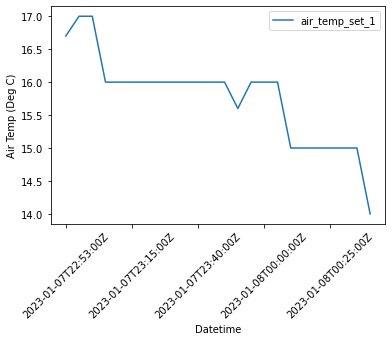

In [75]:
data_obs_df.plot(xlabel="Datetime", ylabel="Air Temp (Deg C)",rot=45)
